In [1]:
# import libraries

# to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

# max columns 
pd.set_option('display.max_columns', None)

# hide warnings
import warnings
warnings.filterwarnings('ignore')

from math import *

In [2]:
# train data
df = pd.read_csv("bank-full.csv",sep = ';')

In [3]:
# checking the number of rows and columns
num_rows, num_columns = df.shape
print("Training Data:")
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}\n")

Training Data:
Number of Rows: 45211
Number of Columns: 17



In [4]:
# Null values in dataset
df_null = df.isnull().sum().sum()
df_duplicate = df.duplicated().sum().sum()
print(f"Null count in Data: {df_null}")
print(f"Duplicate count in Data: {df_duplicate}")

Null count in Data: 0
Duplicate count in Data: 0


In [5]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


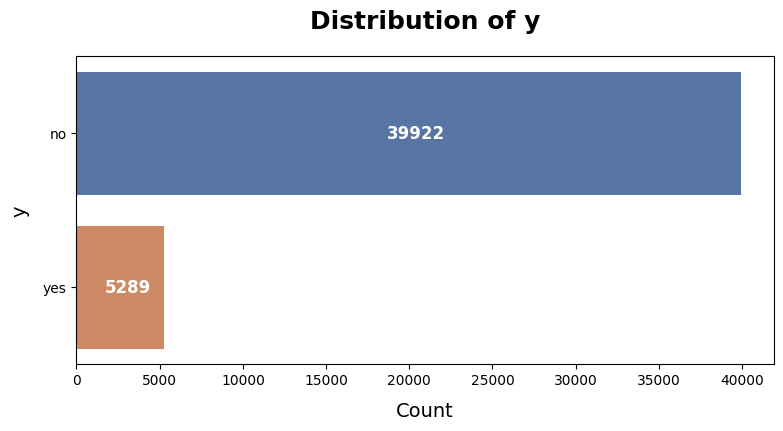

In [6]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(9, 4))

# Create the count plot
sns.countplot(y="y", data=df, ax=ax, palette="deep")

# Customize the plot
ax.set_title("Distribution of y", fontsize=18, fontweight='semibold', pad=20)
ax.set_xlabel("Count", fontsize=14, labelpad=10)
ax.set_ylabel("y", fontsize=14, labelpad=10)

# Add value labels to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=12, padding=5, color='white', fontweight='bold')

plt.show()

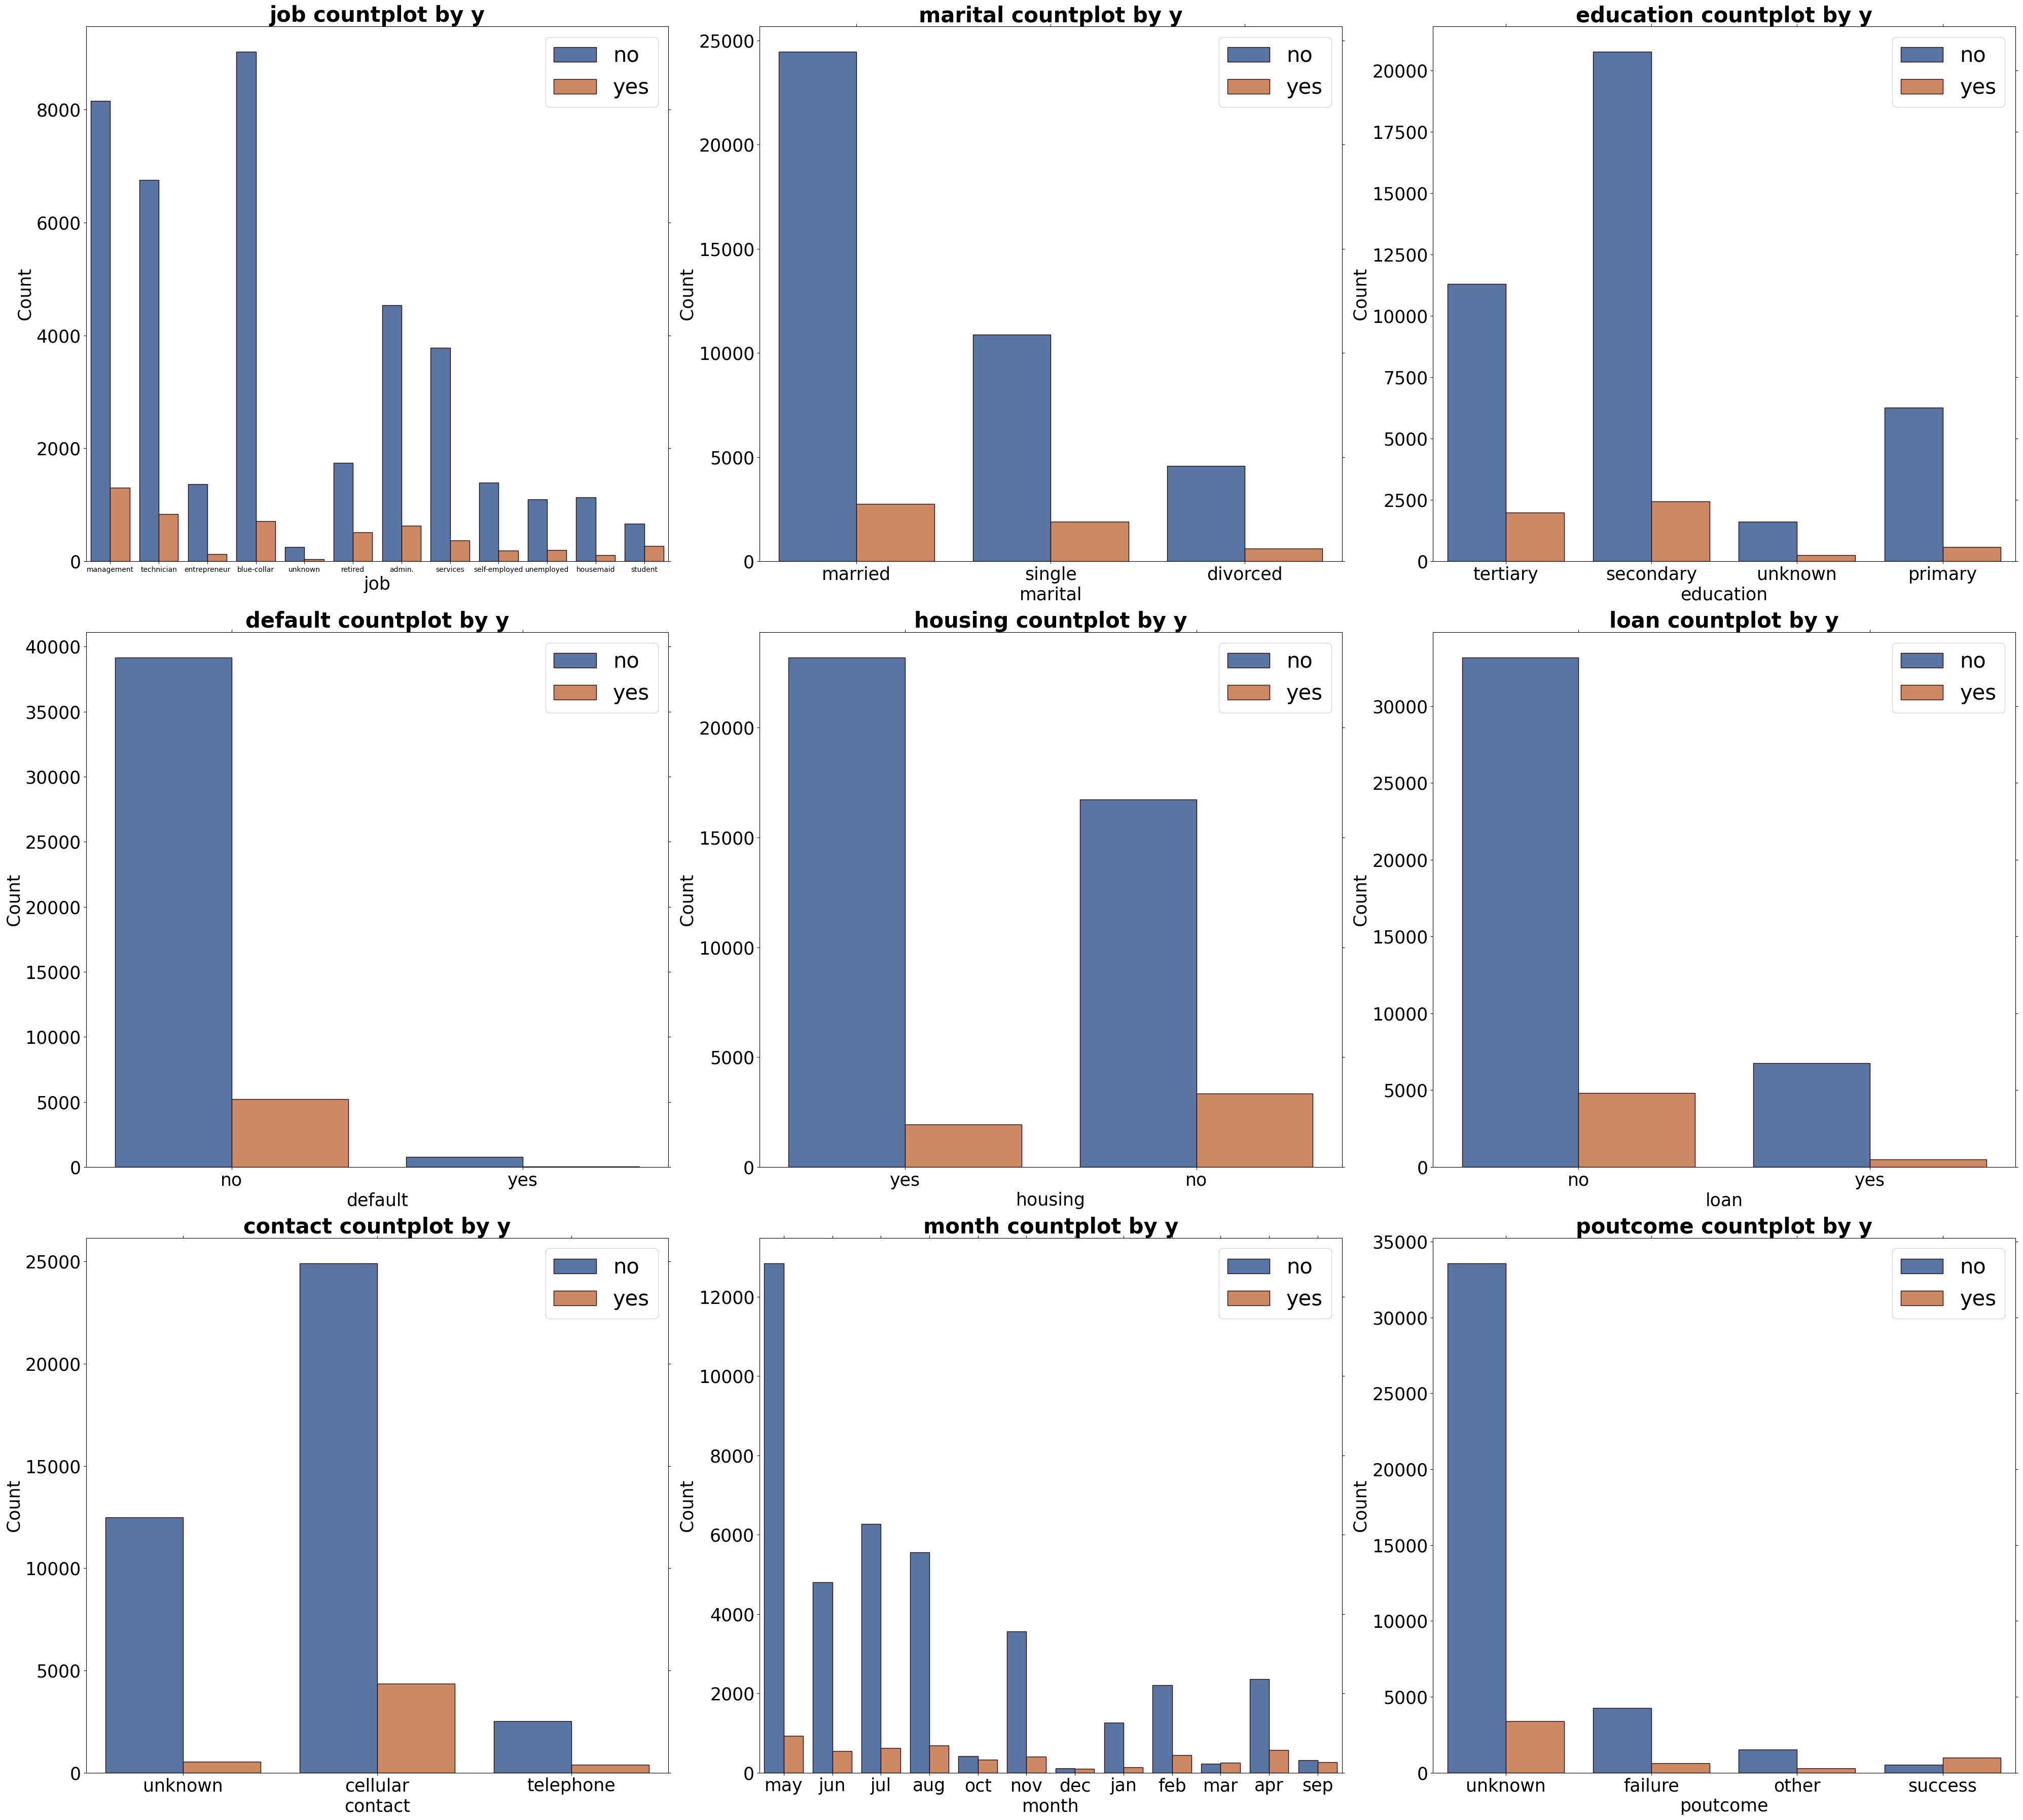

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = ['job','marital','education','default','housing','loan', 'contact','month','poutcome']

target = 'y'

# Increase the figure size slightly
fig, axs = plt.subplots(len(cat_cols)//3 + len(cat_cols) % 3, 3, figsize=(40, len(cat_cols)*4))  # Adjust width and height as needed

# background_color = 'grey'
for i, col in enumerate(cat_cols):
    # Access the current subplot using axs
    ax = axs.flat[i]
    p = sns.countplot(x=col, hue=target, data=df, palette='deep', color='#26090b', edgecolor='#26090b', ax=ax)

    # Set larger font sizes for title, labels, and ticks (as before)
    ax.set_title(f"{col} countplot by y", fontsize=30, fontweight='bold')
    ax.set_xlabel(col, fontsize=25)
    ax.set_ylabel('Count', fontsize=25)
    if i != 0 and col != 0:
        ax.tick_params(labelsize=25, axis='x', top=True, right=True)
    ax.tick_params(labelsize=25, axis='y', top=True, right=True)

    # Get legend handles and labels (if legend exists)
    handles, labels = ax.get_legend_handles_labels()
    if handles:  # Check if there's a legend
      # Set legend font size
        leg = ax.legend(handles, labels, prop={'size': 30})  # Adjust size as needed

# Adjust layout
plt.tight_layout()
plt.show()

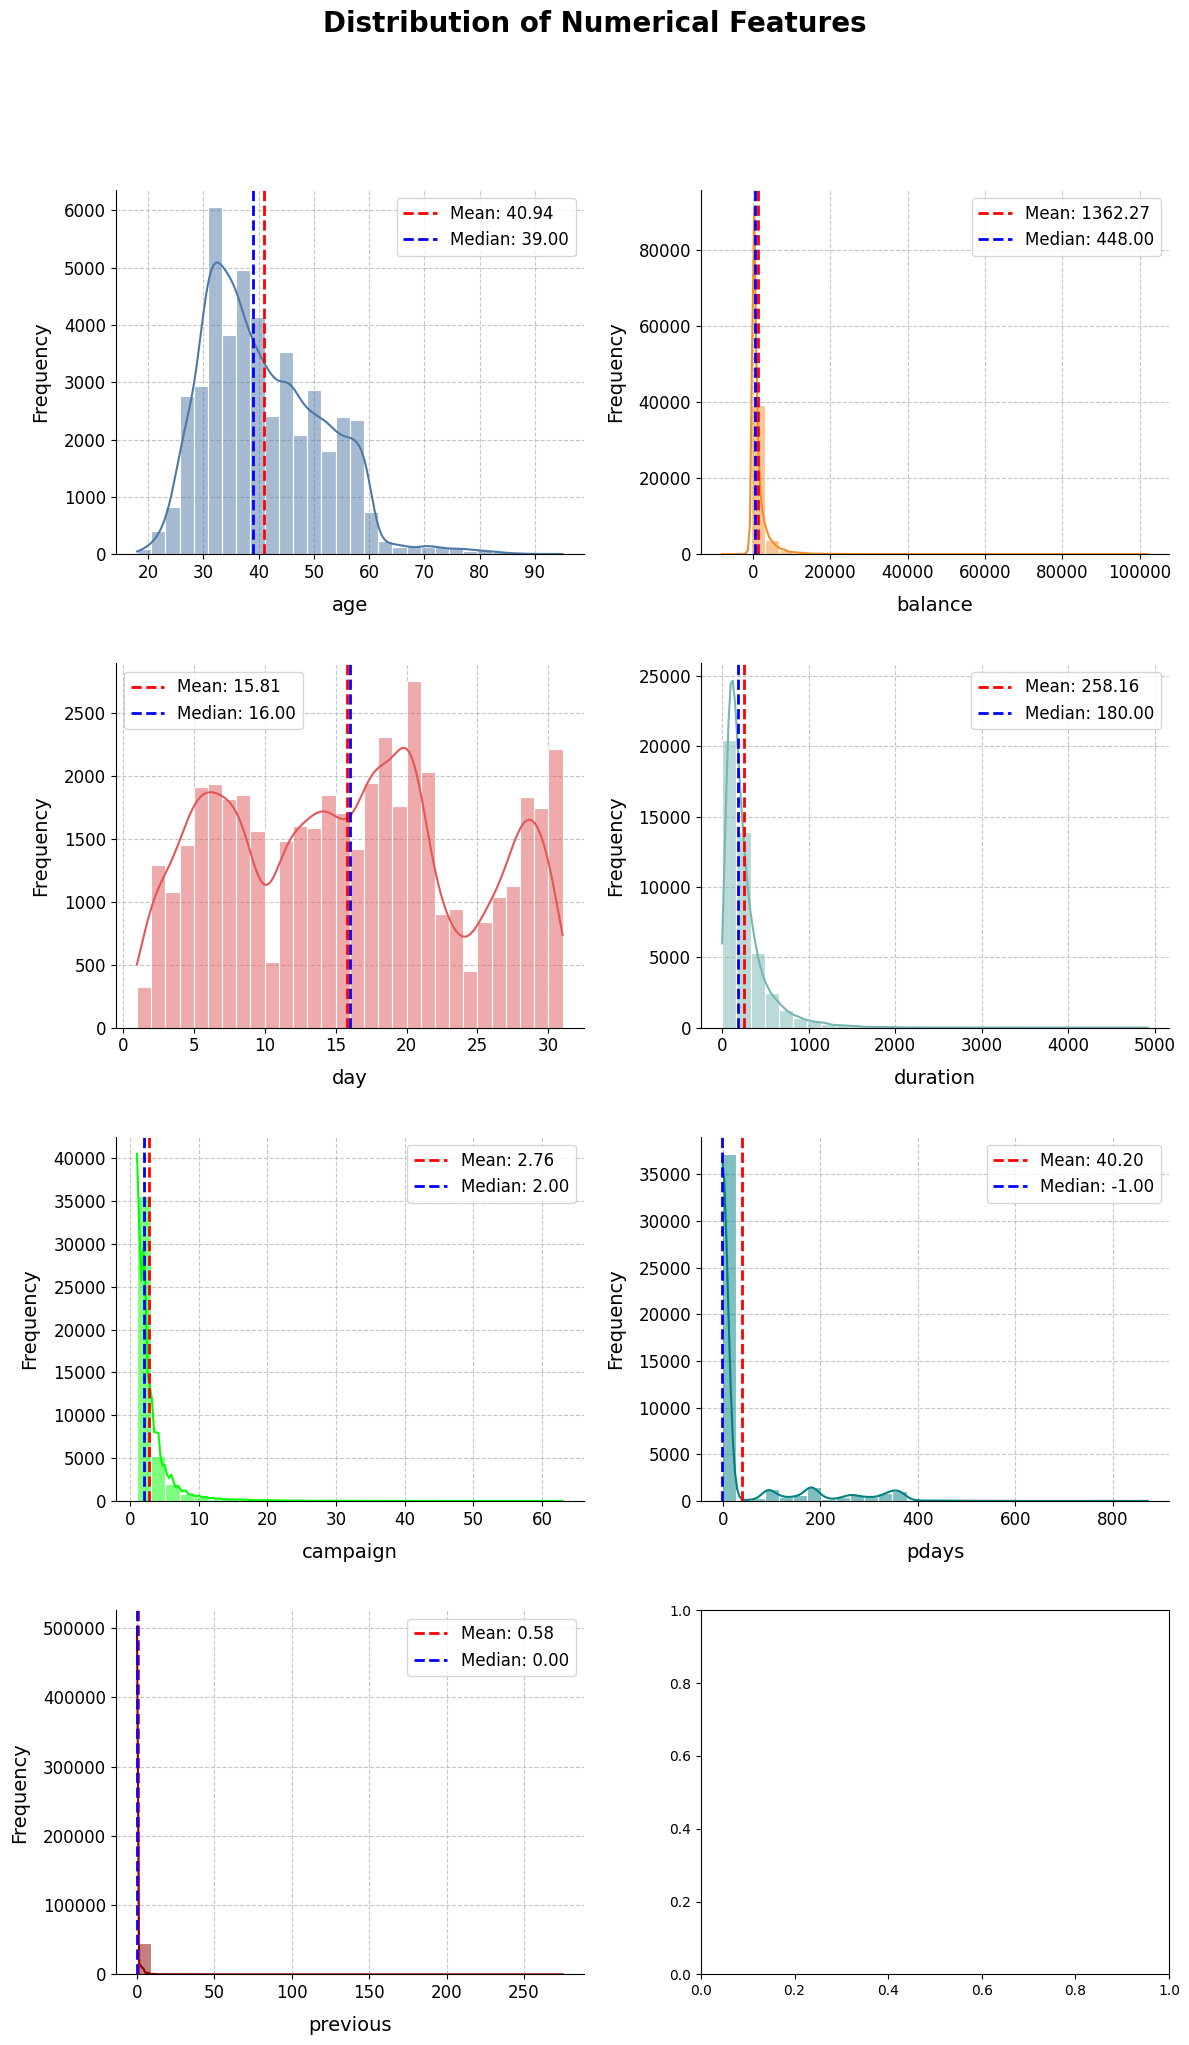

In [9]:
num_cols = ['age','balance','day','duration','campaign','pdays','previous']
colors = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2','lime','teal','darkred']

fig, axes = plt.subplots(4, 2, figsize=(12, 20))
fig.suptitle("Distribution of Numerical Features", fontsize=20, fontweight='bold', y=1.02)

for i, column in enumerate(num_cols):
    ax = axes[i//2, i%2]
    sns.histplot(data=df, x=column, kde=True, bins=30, ax=ax, color=colors[i], edgecolor='white', linewidth=0.8)
    
    mean, median = df[column].mean(), df[column].median()
    ax.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
    ax.axvline(median, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')

    ax.set_xlabel(column, fontsize=14, labelpad=10)
    ax.set_ylabel('Frequency', fontsize=14, labelpad=10)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_axisbelow(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(fontsize=12)

plt.tight_layout()
fig.subplots_adjust(top=0.93, hspace=0.3, wspace=0.25)
plt.show()

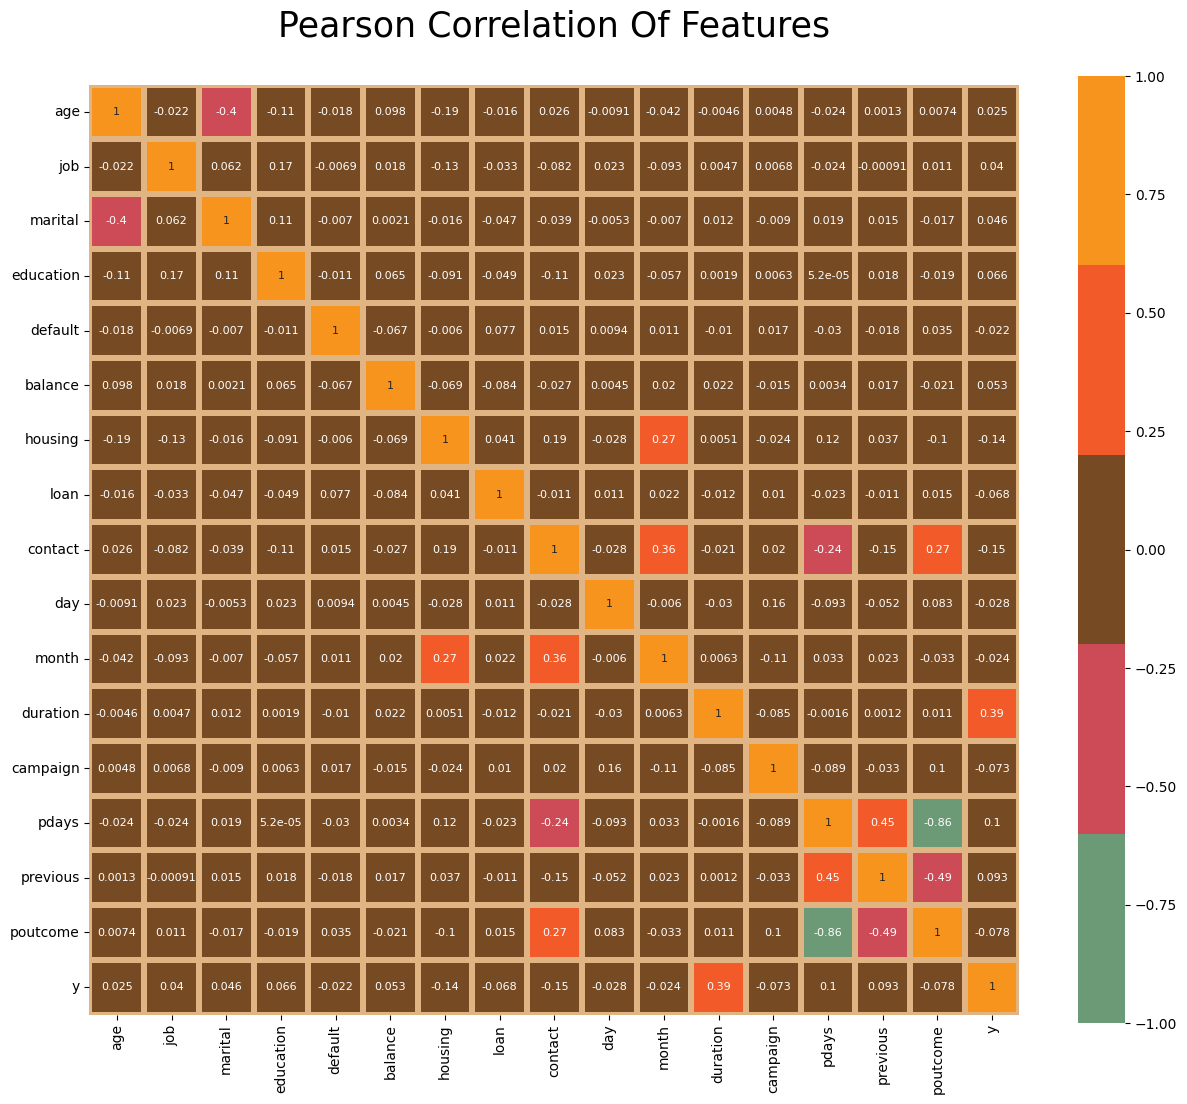

In [10]:
palette_cmap = ["#6c9a76","#cc4b57","#764a23","#f25a29","#f7941d"]
df_corr = df.copy()

catcol = [col for col in df_corr.columns if df_corr[col].dtype == "object"]
le = LabelEncoder()
for col in catcol:
        df_corr[col] = le.fit_transform(df_corr[col])


plt.subplots(figsize =(15, 15))

sns.heatmap(df_corr.corr(), cmap = palette_cmap, square=True, cbar_kws=dict(shrink =.82), 
            annot=True, vmin=-1, vmax=1, linewidths=3,linecolor='#e0b583',annot_kws=dict(fontsize =8))
plt.title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

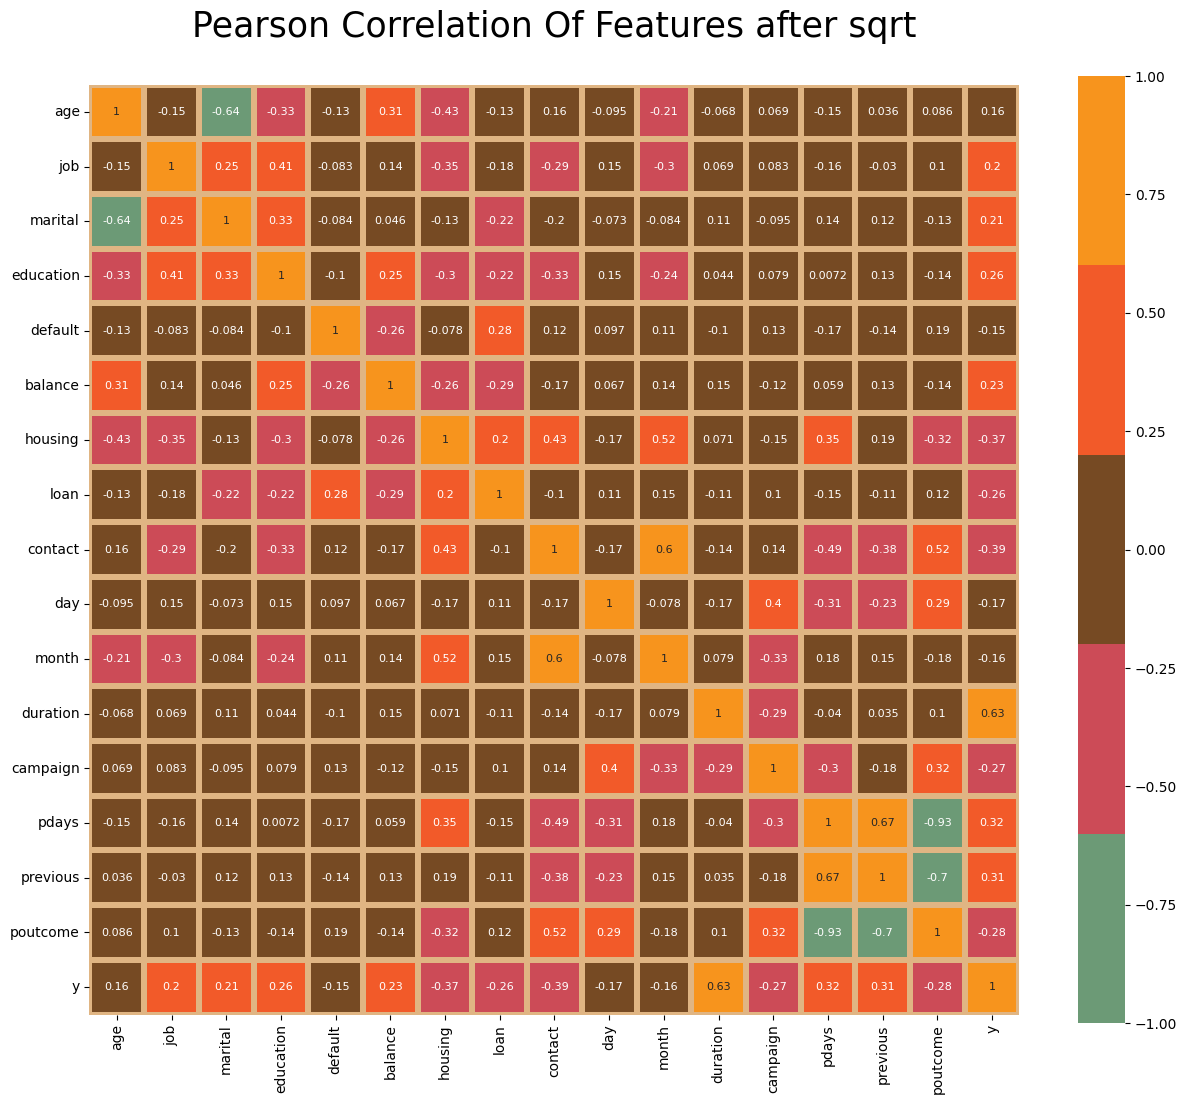

In [11]:
corr_matrix = df_corr.corr().copy()
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        if corr_matrix.iloc[i,j] < 0:
            corr_matrix.iloc[i,j] = -sqrt(-corr_matrix.iloc[i,j])
        else:
            corr_matrix.iloc[i,j] = sqrt(corr_matrix.iloc[i,j])
            
plt.subplots(figsize =(15, 15))
sns.heatmap(corr_matrix, cmap = palette_cmap, square=True, cbar_kws=dict(shrink =.82), 
            annot=True, vmin=-1, vmax=1, linewidths=3,linecolor='#e0b583',annot_kws=dict(fontsize =8))
plt.title("Pearson Correlation Of Features after sqrt\n", fontsize=25)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()